In [ ]:
QSAR Model Building of Acetylcholinesterase Inhibitors

By: Baasim Sohail

In [1]:
import pandas as pd

In [2]:
dataset_url = 'https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv'
dataset = pd.read_csv(dataset_url)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.612610
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.595166
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.419075
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.460924


In [4]:
X= dataset.drop(['pIC50'],axis=1)
X


,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Y= dataset.iloc[:,-1]
Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
4690    5.612610
4691    5.595166
4692    5.419075
4693    5.460924
4694    5.555955
Name: pIC50, Length: 4695, dtype: float64

In [12]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.1 MB 2.5 MB/s eta 0:00:05
   ----- ---------------------------------- 1.6/11.1 MB 3.0 MB/s eta 0:00:04
   ------ --------------------------------- 1.8/11.1 MB 2.5 MB/s eta 0:00:04
   --------- ------------------------------ 2.6/11.1 MB 2.5 MB/s eta 0:00:04
   ------------- -------------------------- 3.7/11.1 MB 3.0 MB/s eta 0:00:03
   ----------------- ---------------------- 4.7/11.1 MB 3.3 MB/s eta 0:00:02
   -------------------- ------------------- 5.8/11.1 MB 3.5 MB/s eta 0:00:02
   ------------------------ --------------- 6.8/11.1 MB 3.7 MB/s eta 0:00:02
   ----------------------------- ---------- 8.1/11.1 MB 4.0 MB/s eta 0:00:01
   ----------------

In [15]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X= remove_low_variance(X, threshold=0.1)
X

,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP37,PubchemFP143,...,PubchemFP758,PubchemFP761,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824
0,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,0,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,1,0,0
4691,1,1,0,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,1,0,0
4692,1,1,0,1,0,1,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0
4693,1,1,0,1,0,1,1,1,0,0,...,0,0,0,1,1,0,0,1,0,0


In [17]:
X.to_csv('descriptor_list.csv', index = False)

In [ ]:
#random forest regression model

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
model = RandomForestRegressor (n_estimators=400, random_state=42)
model.fit(X, Y)
r2 = model.score(X,Y)
r2

0.8606420221931069

In [ ]:
#Model Prediction

In [21]:
Y_pred = model.predict(X)
Y_pred

array([5.96604238, 6.39432813, 4.91272069, ..., 5.80330783, 5.6971644 ,
       5.62759557], shape=(4695,))

In [ ]:
#Model Performance

In [25]:
print('Mean squared error (MSE): %.2f'% mean_squared_error(Y, Y_pred))

print ('Coefficient of determination: %.2f'% r2_score(Y, Y_pred))

Mean squared error (MSE): 0.34
Coefficient of determination: 0.86


In [ ]:
#Data visualization (Experimental vs Predicted pIC50 for training Data)


In [28]:
!pip install matplot


Defaulting to user installation because normal site-packages is not writeable


In [29]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


In [30]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

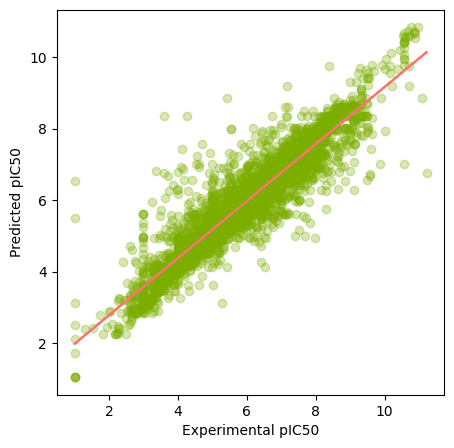

In [33]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

In [ ]:
# Save as Pickle 

In [35]:
import pickle

In [36]:
pickle.dump(model, open('acetylcholinesterase_model.pkl', 'wb'))